## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### 2. Load the dataset and display a sample of five rows of the data frame.

In [5]:
file_path = "C:/Users/ASUS-NB/Downloads/heart_2020_cleaned.csv"
df = pd.read_csv(file_path)
sample = df.sample(5)
print(sample)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
273549           No  28.48     Yes              No     No             0.0   
107781           No  20.67      No              No     No             0.0   
175635           No  24.13     Yes              No    Yes             0.0   
70296            No  21.93     Yes              No     No             4.0   
23330            No  30.50     Yes              No     No             7.0   

        MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
273549           0.0          No    Male        30-34  White       No   
107781           0.0          No    Male  80 or older  White       No   
175635           0.0          No  Female        60-64  White       No   
70296            5.0          No  Female        40-44  White       No   
23330            3.0         Yes  Female        65-69  White       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
273549            

### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [7]:
print(df.shape)
df.info()


(319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyD

### 4. Check the statistical summary of the dataset and write your inferences.

In [8]:
summary=df.describe()
print(summary)

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [11]:
missing_percentages = df.isnull().mean() * 100
# print(missing_percentages)
df_cleaned = df.dropna()
print(df.shape)

(319795, 18)


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [15]:
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
# print("Duplicate Rows:")
# print(duplicate_rows)

# Drop duplicate rows
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates.shape)

(301717, 18)


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


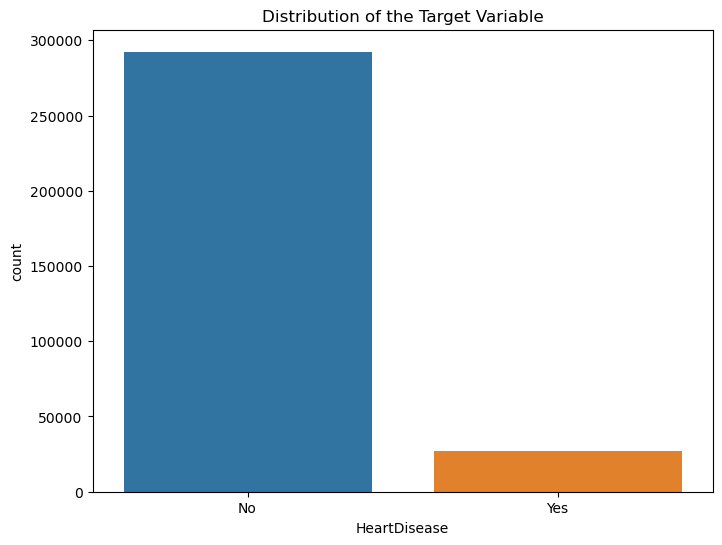

In [21]:
target_variable = 'HeartDisease'
target_distribution = df[target_variable].value_counts()
print(target_distribution)


### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

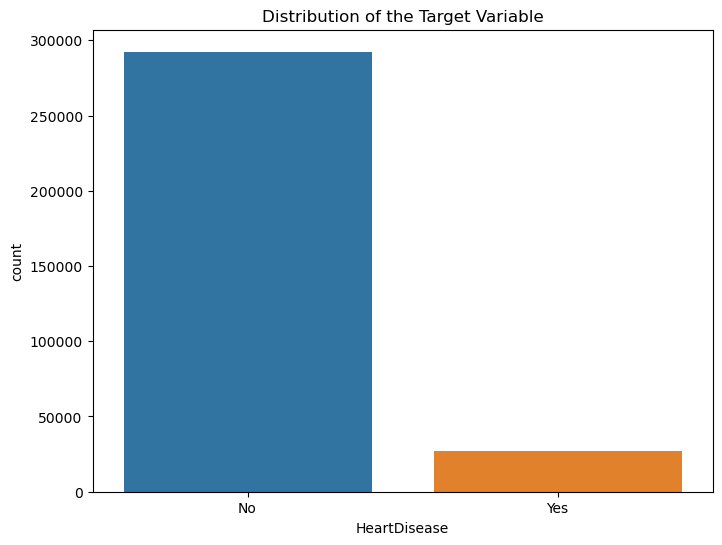

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=df)
plt.title('Distribution of the Target Variable')
plt.show()

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [25]:
unique_categories = df['Diabetic'].unique()
print(unique_categories)
df['Diabetic'] = df['Diabetic'].replace({
    'Yes (during pregnancy)': 'Yes',
    'No, borderline diabetes': 'No'
})
print(df['Diabetic'].unique())

['Yes' 'No']
['Yes' 'No']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [27]:
target_column='HeartDisease'
uniques= df[target_column].unique()
# print(uniques)
df[target_column] = df[target_column].replace({
    'No':0,
    'Yes':1
})
print(df[target_column].unique())

['No' 'Yes']
[0 1]


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
file_path = "C:/Users/ASUS-NB/Downloads/heart_2020_cleaned.csv"
df = pd.read_csv(file_path)
label_encode_columns = ["AgeCategory", "Race", "GenHealth"]
dummy_encode_columns = [col for col in df.columns if col not in label_encode_columns]

label_encoder = LabelEncoder()
df[label_encode_columns] = df[label_encode_columns].apply(lambda col: label_encoder.fit_transform(col))

df = pd.get_dummies(df, columns=dummy_encode_columns)

print(df.head())

   AgeCategory  Race  GenHealth  HeartDisease_No  HeartDisease_Yes  BMI_12.02  \
0            7     5          4                1                 0          0   
1           12     5          4                1                 0          0   
2            9     5          1                1                 0          0   
3           11     5          2                1                 0          0   
4            4     5          4                1                 0          0   

   BMI_12.08  BMI_12.13  BMI_12.16  BMI_12.2  ...  SleepTime_21.0  \
0          0          0          0         0  ...               0   
1          0          0          0         0  ...               0   
2          0          0          0         0  ...               0   
3          0          0          0         0  ...               0   
4          0          0          0         0  ...               0   

   SleepTime_22.0  SleepTime_23.0  SleepTime_24.0  Asthma_No  Asthma_Yes  \
0               0     

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [7]:
# Assuming 'HeartDisease' is the target column
target_column = 'HeartDisease'
import pandas as pd
from sklearn.preprocessing import LabelEncoder
file_path = "C:/Users/ASUS-NB/Downloads/heart_2020_cleaned.csv"
df = pd.read_csv(file_path)
# Store the target column in y
y = df[target_column]

# Store the rest of the columns in X
X = df.drop(columns=[target_column])

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (319795, 17)
Shape of y: (319795,)


### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [8]:
from sklearn.model_selection import train_test_split


test_size = 0.3


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (223856, 17)
Shape of X_test: (95939, 17)
Shape of y_train: (223856,)
Shape of y_test: (95939,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [9]:
from sklearn.preprocessing import StandardScaler


numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns


scaler = StandardScaler()


X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])


X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


print("Standardized X_train:")
print(X_train.head())

print("\nStandardized X_test:")
print(X_test.head())


Standardized X_train:
             BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
303145 -1.229576      No              No     No        0.080386     -0.490018   
61634   0.391450      No              No     No       -0.423721     -0.490018   
117690  0.877286      No              No     No       -0.423721     -0.490018   
132104 -1.059769     Yes              No     No       -0.423721     -0.490018   
262165 -0.405699      No              No     No       -0.423721     -0.490018   

       DiffWalking     Sex  AgeCategory   Race Diabetic PhysicalActivity  \
303145          No  Female        45-49  White       No              Yes   
61634           No  Female        70-74  Other      Yes              Yes   
117690          No    Male        50-54  White      Yes              Yes   
132104          No    Male  80 or older  White       No              Yes   
262165          No  Female        75-79  White       No              Yes   

        GenHealth  SleepTime Asthm

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [11]:
from sklearn.metrics import accuracy_score

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    
    
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
target_column = 'HeartDisease'
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
file_path = "C:/Users/ASUS-NB/Downloads/heart_2020_cleaned.csv"
df = pd.read_csv(file_path)
# Store the target column in y

target_column='HeartDisease'
uniques= df[target_column].unique()
# print(uniques)
df[target_column] = df[target_column].replace({
    'No':0.0,
    'Yes':1.0
})

# print(df[target_column])


# Store the target column in y
target_column = 'HeartDisease'
y = df[target_column]

# Store the rest of the columns in X
X = df.drop(columns=[target_column])

# print(X);
# print(y);
# 

test_size = 0.3


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)
# Define the classifiers
logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

# Create a stacked classifier
stacked_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ],
    final_estimator=LogisticRegression()
)

# List of models
models = [logreg_model, knn_model, nb_model, dt_model, rf_model, adaboost_model, gb_model, stacked_model]

# Train, evaluate, and compare the models
for model in models:
    model_name = type(model).__name__
    print(f"\nTraining and evaluating {model_name}...")

    # Train and evaluate the model
    accuracy = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    print(f"Accuracy on the test set: {accuracy:.4f}")

    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean Cross-validation score: {cv_scores.mean():.4f}")

          BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
303145  20.51      No              No     No             4.0           0.0   
61634   30.82      No              No     No             0.0           0.0   
117690  33.91      No              No     No             0.0           0.0   
132104  21.59     Yes              No     No             0.0           0.0   
262165  25.75      No              No     No             0.0           0.0   
...       ...     ...             ...    ...             ...           ...   
119879  29.65      No              No     No             0.0           0.0   
259178  42.60     Yes              No     No             0.0           5.0   
131932  31.19     Yes              No     No            12.0           6.0   
146867  22.24      No              No     No             7.0           5.0   
121958  36.39     Yes              No     No             0.0           0.0   

       DiffWalking     Sex  AgeCategory   Race                 

ValueError: could not convert string to float: 'No'

### Conclusion

----
## Happy Learning:)
----